<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: Redes Neuronales #


##Inicialización##

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import load_model
import tensorflow as tf
from sklearn.metrics import classification_report


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [26]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

Cloning into 'fiumark'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 222 (delta 119), reused 68 (delta 30), pack-reused 0
Receiving objects: 100% (222/222), 628.42 KiB | 11.86 MiB/s, done.
Resolving deltas: 100% (119/119), done.
/content/fiumark/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


##Pre procesamiento##

In [27]:
pd.options.display.max_columns = None
df = pp.get_dataset()
df = pp.common_preprocessing(df)
X_train, X_test, y_train, y_test = pp.get_train_test_data(df)

In [30]:
#Necesito hacer ohe porque estoy usando softmax
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

##Entrenamiento##

In [28]:
num_classes = 2
model = Sequential()
model.add(Dense(8, input_shape=(13,), activation='tanh')) #Cantidad de columnas 13
model.add(Dense(num_classes, activation="softmax"))

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()]) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Entreno
history = model.fit(X_train.values,y_train,epochs=100, validation_data=(X_test.values, y_test))

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 0.4411 - auc_1: 0.8708 - val_loss: 0.4901 - val_auc_1: 0.8377
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4778 - auc_1: 0.8510 - val_loss: 0.4902 - val_auc_1: 0.8401
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4578 - auc_1: 0.8625 - val_loss: 0.4852 - val_auc_1: 0.8406
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4134 - auc_1: 0.8922 - val_loss: 0.4971 - val_auc_1: 0.8333
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4218 - auc_1: 0.8889 - val_loss: 0.4845 - val_auc_1: 0.8421
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4112 - auc_1: 0.8940 - val_loss: 0.5327 - val_auc_1: 0.8124
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4235 - auc_1: 0.8786 - val_loss: 0.4792 - val_auc_1: 0.8484
Epoch 8/100
22/22 [==============================] - 0

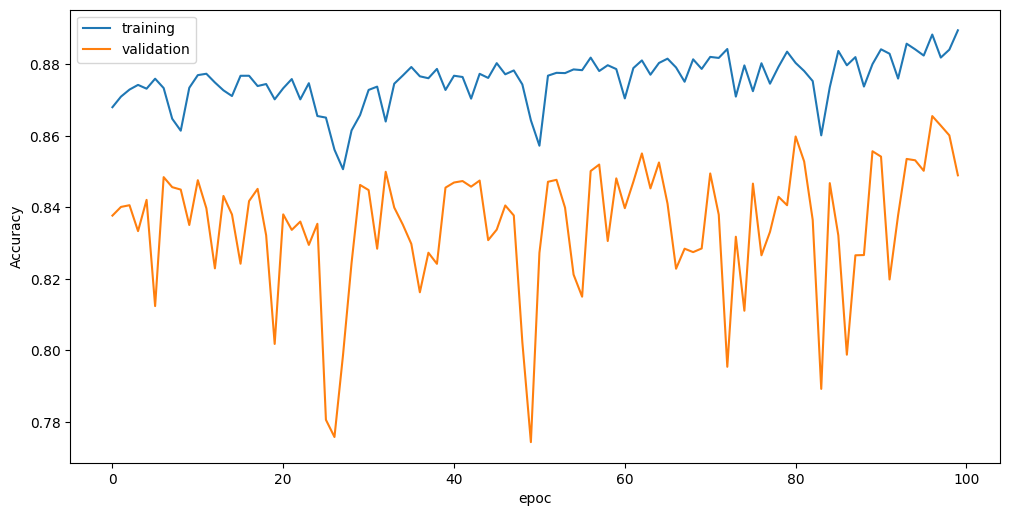

In [35]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["auc_1"], label="training")
plt.plot(history.history["val_auc_1"], label="validation")
plt.legend()

##Evaluación del modelo##

In [53]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1, out=None)

###Precisión recall y F1-score###

In [55]:
y_test = np.argmax(y_test, axis=1, out=None)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        70
           1       0.89      0.63      0.74        51

    accuracy                           0.81       121
   macro avg       0.83      0.79      0.79       121
weighted avg       0.82      0.81      0.80       121



###Accuracy###

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8099173553719008

###AUC-ROC###

In [60]:
from sklearn.metrics import roc_curve, auc

def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)
auc_roc

0.7851540616246498

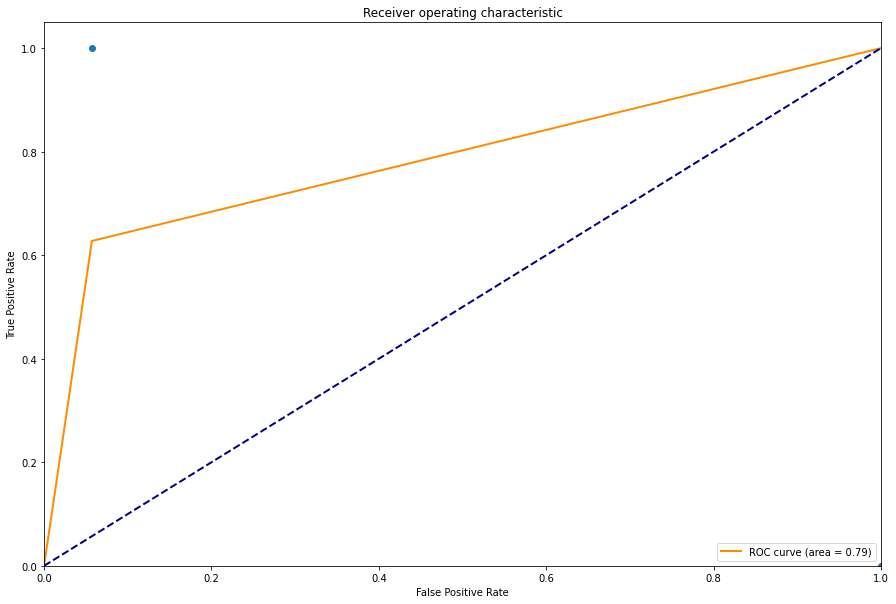

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc(fpr, tpr, thresholds)

###Matriz de confusión###

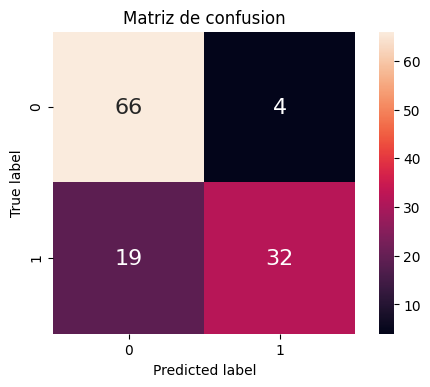

In [62]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test, y_pred)

##Predicción##

In [64]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X_holdout = pp.common_preprocessing(X_holdout)
prediction = model.predict(X_holdout)
pred_hold = np.argmax(prediction, axis=1, out=None)
df2 = pd.DataFrame(pred_hold,columns=['volveria'])
df3 = pd.concat([X_holdout.id_usuario,df2],axis=1)
df3.to_csv('redesneuronales.csv')
df3

,id_usuario,volveria
0,650,1
1,234,0
2,31,0
3,552,0
4,411,0
...,...,...
85,354,0
86,82,0
87,172,0
88,8,0
